Name: Jamal Naga<br>
Course and Section: CPE019 - CPE32S3<br>
Date of Submission: 02/07/2024 <br>
Instructor: Engr. Roman Richard<br>



### Correlation Analysis in Python

Objectives:<br>
Part 1: The Dataset <br>
Part 2: Scatterplot Graphs and Correlatable Variables <br>
Part 3: Calculating Correlation with Python <br>
Part 4: Visualizing </b><br>

##Scenario/Background
Correlation is an important statistical relationship that can indicate whether the variable values are
linearly related. <br>
In this lab, you will learn how to use Python to calculate correlation. In Part

1, you will setup the dataset.<br>
In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part <br>
3, you will use Python to calculate the correlation between two sets of variable. <br>

Required Resources
1 PC with Internet access
Raspberry Pi version 2 or higher
Python libraries: pandas, numpy, matplotlib, seaborn
Datafiles: brainsize.txt

## Part 1: The Dataset


You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology
students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block
Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The
researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects.
Information about gender and body size (height and weight) are also included. The researchers withheld
the weights of two subjects and the height of one subject for reasons of confidentiality. Two simple
modifications were applied to the dataset: <br>

1. Replace the quesion marks used to represent the withheld data points described above by the
'NaN' string. The substitution was done because Pandas does not handle the question marks
correctly. <br>
2. Replace all tab characters with commas, converting the dataset into a CSV dataset. <br>
The prepared dataset is saved as brainsize.txt. <br>
Step 1: Loading the Dataset From a File. <br>
Before the dataset can be used, it must be loaded onto memory. <br>

In the code below, <br>

The first line imports the pandas modules and defines pd as a descriptor that refers to the module.<br>

The second line loads the dataset CSV file into a variable called brainFile. <br>

The third line uses read_csv(), a pandas method, to convert the CSV dataset stored in brainFile into a dataframe. The dataframe is then stored in the brainFrame variable. <br>

Run the cell below to execute the described functions. <br>




In [ ]:

# Import the pandas library
import pandas as pd

# Define the file path
brainFile = '/content/brainsize.txt'

# Read the CSV file into a DataFrame using variable-length whitespace as the column delimiter
brainFrame = pd.read_csv(brainFile,delim_whitespace=True)

Step 2: Verifying the dataframe. <br>
To make sure the dataframe has been correctly loaded and created, use the head() method. Another Pandas method, head() displays the first five entries of a dataframe.

In [ ]:
# code that display first five entries of a dataframe

brainFrame.head()

NameError: name 'brainFrame' is not defined

## Part 2: Scatterplot Graphs and Correlatable Variables

Step 1: The pandas describe() method. <br>

The pandas module includes the describe() method which performs same common calculations against a given dataset. In addition to provide common results including count, mean, standard deviation, minimum, and maximum, describe() is also a great way to quickly test the validity of the values in the dataframe. <br>


Run the cell below to output the results computed by describe() against the brainFrame dataframe.

In [ ]:
# code that performs same common calculations against a given dataset

brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Step 2: Scatterplot graphs<br><br>


Scatterplot graphs are important when working with correlations as they allow for a quick visual
verification of the nature of the relationship between the variables. This lab uses the Pearson correlation coefficient, which is sensitive only to a linear relationship between two variables. Other more robust correlation methods exist but are out of the scope of this lab.<br><br>


a. Load the required modules.<br><br>


Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.
Run the cell below to load these modules.

In [ ]:
# Code to import numpy and matplotlib library

import numpy as np
import matplotlib.pyplot as plt

b. Separate the data. <br><br>
To ensure the results do not get skewed because of the differences in male and female bodies, the dateframe is split into two dataframes: one containing all male entries and another with only female instances. <br><br>
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the
respective entries.

In [ ]:
# Code that separate the two dataframes men and women

menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

c. Plot the graphs.<BR><br>
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line
below uses Pandas mean() method to calculate the mean value between the three and store the result in the menMeanSmarts variable. Notice that the first line also refers to the menDf, the filtered dataframe containing only male entries.<BR><br>
The second line uses the matplotlib method scatter() to create a scatterplot graph between the menMeanSmarts variable and the MRI_Countattribute. The MRI_Count in this dataset can be thought as of a measure of the physical size of the subjects' brains.<BR><br>
The third line simply displays the graph.<BR><br>
The fourth line is used to ensure the graph will be displayed in this notebook.

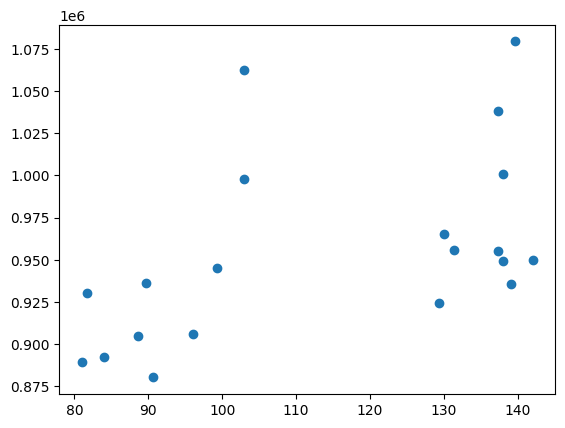

In [ ]:
# code that display the graph between the menMeanSmarts variable and the MRI_Countattribute

menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe. <br><br>


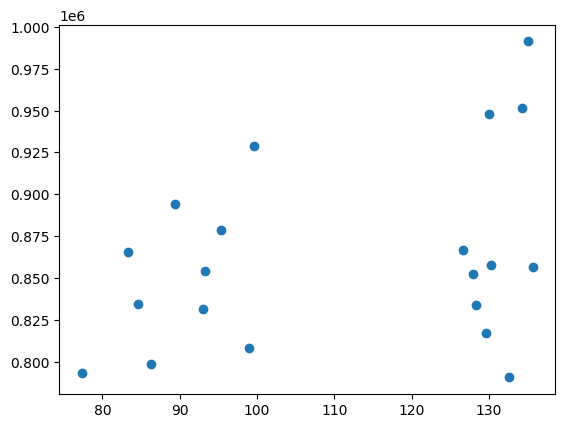

In [ ]:
# code that display the graph between the womenMeanSmarts variable and the MRI_Countattribute

womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

### Part 3: Calculating Correlation with Python <br><Br>

Step 1: Calculate correlation against brainFrame.<br><Br>
The pandas corr() method provides an easy way to calculate correlation against a dataframe. By simply calling the method against a dataframe, one can get the correlation between all variables at the same
time.


In [ ]:
# Code that display the correlation between all variables at the same time

brainFrame.corr(method='pearson')

<ipython-input-17-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


from matplotlib import pyplot as plt
_df_1['FSIQ'].plot(kind='hist', bins=20, title='FSIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['VIQ'].plot(kind='hist', bins=20, title='VIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PIQ'].plot(kind='hist', bins=20, title='PIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FSIQ', y='VIQ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='VIQ', y='PIQ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='PIQ', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Weight', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['FSIQ'].plot(kind='line', figsize=(8, 4), title='FSIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['VIQ'].plot(kind='line', figsize=(8, 4), title='VIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['PIQ'].plot(kind='line', figsize=(8, 4), title='PIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='FSIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='VIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='PIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Weight', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled
with 1s? Is that a coincidence? Explain.

**They are not coincidence because it is always presented as 1 since it's one property of correlational matrices, where if you correlating a variable to itself the result is the same since you are just comparing it to itself that result to value of 1**

Still looking at the correlation table above, notice that the values are mirrored; values below the 1
diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.<br>



**It is not coicindence because that value shown below and above the diagonal is a consequence of the symmetric nature of correlation coefficients used in presenting correlational matrices.**

Using the same corr() method, it is easy to calculate the correlation of the variables contained in the
female-only dataframe:

In [ ]:
# code that display the female dataframe that used corr() method in calcuting the correlation of variables

womenDf.corr(method='pearson')

<ipython-input-18-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


from matplotlib import pyplot as plt
_df_35['FSIQ'].plot(kind='hist', bins=20, title='FSIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['VIQ'].plot(kind='hist', bins=20, title='VIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['PIQ'].plot(kind='hist', bins=20, title='PIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_39.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='FSIQ', y='VIQ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='VIQ', y='PIQ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='PIQ', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='Weight', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['FSIQ'].plot(kind='line', figsize=(8, 4), title='FSIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['VIQ'].plot(kind='line', figsize=(8, 4), title='VIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['PIQ'].plot(kind='line', figsize=(8, 4), title='PIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='FSIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='VIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='PIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='Weight', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

And the same can be done for the male-only dataframe:

In [ ]:
# code that display the Male dataframe that used corr() method in calcuting the correlation of variables
# Use corr() for the male-only dataframe with the pearson method

menDf.corr(method='pearson')

<ipython-input-19-5da904ba66b9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


from matplotlib import pyplot as plt
_df_18['FSIQ'].plot(kind='hist', bins=20, title='FSIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['VIQ'].plot(kind='hist', bins=20, title='VIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['PIQ'].plot(kind='hist', bins=20, title='PIQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='FSIQ', y='VIQ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='VIQ', y='PIQ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='PIQ', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Weight', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['FSIQ'].plot(kind='line', figsize=(8, 4), title='FSIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['VIQ'].plot(kind='line', figsize=(8, 4), title='VIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['PIQ'].plot(kind='line', figsize=(8, 4), title='PIQ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='FSIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='VIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='PIQ', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='Weight', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Part 4: Visualizing <Br><BR>

Step 1: Install Seaborn.<Br><BR>
To make it easier to visualize the data correlations, heatmap graphs can be used. Based on coloredsquares, heatmap graphs can help identify correlations in a glance.<Br><BR>

The Python module named seaborn makes it very easy to plot heatmap graphs.<Br><BR>
First, run the cell below to download and install the seaborn module.


In [ ]:
# Code cell 11

!pip install seaborn

Step 2: Plot the correlation heatmap.<br><br>
Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the cell below:<br><br>
Line 1: Generates a correlation table based on the womenNoGenderDf dataframe and stores it on wcorr.<br><br>
Line 2: Uses the seaborn heatmap() method to generate and plot the heatmap. Notice that heatmap() takes wcorr as a parameter.<br><br>
Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for informational purposes.

<ipython-input-22-3e1a5c274a49>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

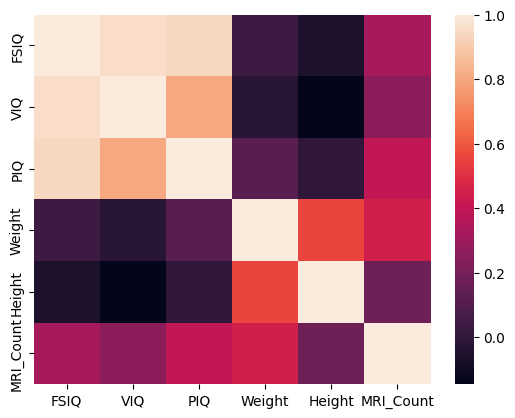

In [ ]:
# Code cell 12

import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-23-bbd46dc5ccce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

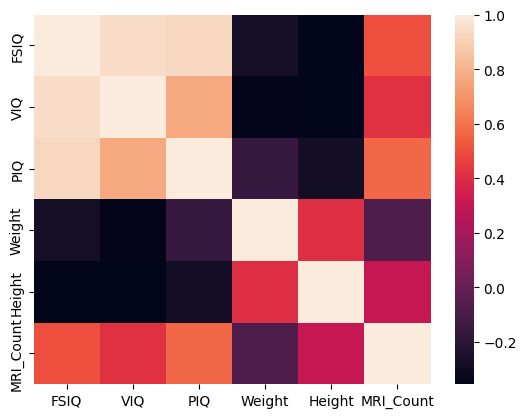

In [ ]:
# Code cell 14

mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

**Many variable pairs present correlation close to zero. What does that mean?**<br>

It means that the values being compared has a weak relationship or no linear relationship between the variables

---


**Why separate the genders?**<br>

As discussed earlier it may differ to the data type needed of the 2 genders

---

**What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.**<br>

It is not expected because having a greate brain size can be link to a higher intellectual intellegence. It can be correlate to education and bioethics that suggest there knowledge on cognitive development


---



###SUPPLEMENTARY ACTIVITY

In [ ]:
# Import the pandas library
import pandas as pd

# Define the file path
laptopFile = '/content/laptop.csv'

# Read the CSV file into a DataFrame using variable-length whitespace as the column delimiter
laptopFrame = pd.read_csv(laptopFile)

In [ ]:
# code that display first five entries of a dataframe

laptopFrame.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# code that performs same common calculations against a given dataset

laptopFrame.describe()

,Unnamed: 0,Inches,Price
count,51.000000,51.000000,51.000000
mean,25.000000,14.905882,49531.877365
std,14.866069,1.552857,33806.159923
min,0.000000,10.100000,10224.432000
25%,12.500000,13.300000,22847.529600
50%,25.000000,15.600000,42624.000000
75%,37.500000,15.600000,68209.056000
max,50.000000,17.300000,152274.240000


from matplotlib import pyplot as plt
_df_52['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53['Inches'].plot(kind='hist', bins=20, title='Inches')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_55.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56.plot(kind='scatter', x='Unnamed: 0', y='Inches', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='Inches', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['Inches'].plot(kind='line', figsize=(8, 4), title='Inches')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_60['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_61['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_61, x='Unnamed: 0', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_62['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_62, x='Inches', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_63['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_63, x='Price', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inchesDf = laptopFrame[(laptopFrame.Company == 'Inches')]
weightDf = laptopFrame[(laptopFrame.Company == 'Weight')]

**Conclusion**

While doing the activity I realized that I am not good enough to read or to visualize the datas. I upon trying to do the procedure I got a hard time to understand how the correlation word that is why I got pressured by the time and did not finish the activity.